In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

In [3]:

X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
classes=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

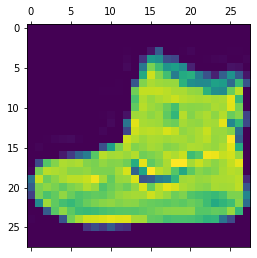

In [8]:
plt.matshow(X_train[0])

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

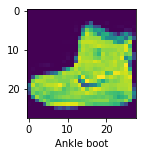

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [13]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.6448 - accuracy: 0.7749


In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.8390


[0.45296230912208557, 0.8389999866485596]

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.87      0.79      1000
           1       0.96      0.97      0.96      1000
           2       0.71      0.77      0.74      1000
           3       0.90      0.77      0.83      1000
           4       0.71      0.79      0.74      1000
           5       0.98      0.89      0.93      1000
           6       0.74      0.45      0.56      1000
           7       0.86      0.97      0.91      1000
           8       0.88      0.98      0.92      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



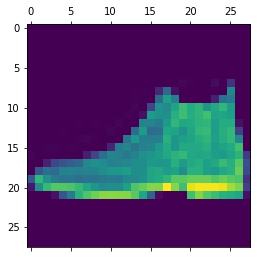

In [16]:
plt.matshow(X_test[0])

In [17]:
yp = model.predict(X_test)

In [18]:
np.argmax(yp[0])

9

In [20]:
classes[np.argmax(yp[0])]

'Ankle boot'